In [2]:
library(tidyverse)
library(psych)
library(lattice)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Step 1: Loading data
-----------------------

In [4]:
survey = read_csv('/home/finc/Dropbox/Projects/SelfReg/data/behavioral/surveyMedley_data_all_subjects_tidy.csv')
head(survey)

Parsed with column specification:
cols(
  subject = col_character(),
  survey = col_character(),
  item_coding = col_character(),
  item_text = col_character(),
  trial_type = col_character(),
  coded_response = col_double(),
  response_time = col_double(),
  junk = col_character()
)


subject,survey,item_coding,item_text,trial_type,coded_response,response_time,junk
sub-s497,brief,reverse,Pleasure and fun sometimes keep me from getting work done.,Q17,2,1.2803,False
sub-s497,upps,forward,"Sometimes when I feel bad, I can't seem to stop what I am doing even though it is making me feel worse.",Q32,2,1.4883,False
sub-s497,brief,forward,I am good at resisting temptation.,Q09,5,-1.5887,False
sub-s497,grit,reverse,New ideas and projects sometimes distract me from previous ones.,Q01,4,1.4063,False
sub-s497,future_time,reverse,There are only limited possibilities in my future.,Q30,2,-0.5147,False
sub-s497,brief,forward,I refuse things that are bad for me.,Q14,4,-2.1987,False


Step 2: Spreading data frame
-----------------------

In [8]:
survey_wide <- survey %>% 
    select(subject, trial_type, coded_response) %>% 
    spread(key = trial_type, value = coded_response)


Step 3: Correlation calculation
-----------------------

In [9]:
corr_poly_all = polychoric(survey_wide[2:41])  
corr_pears_all = corr.test(survey_wide[2:41])  


Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“780 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”

Step 4: Plotting
-----------------------

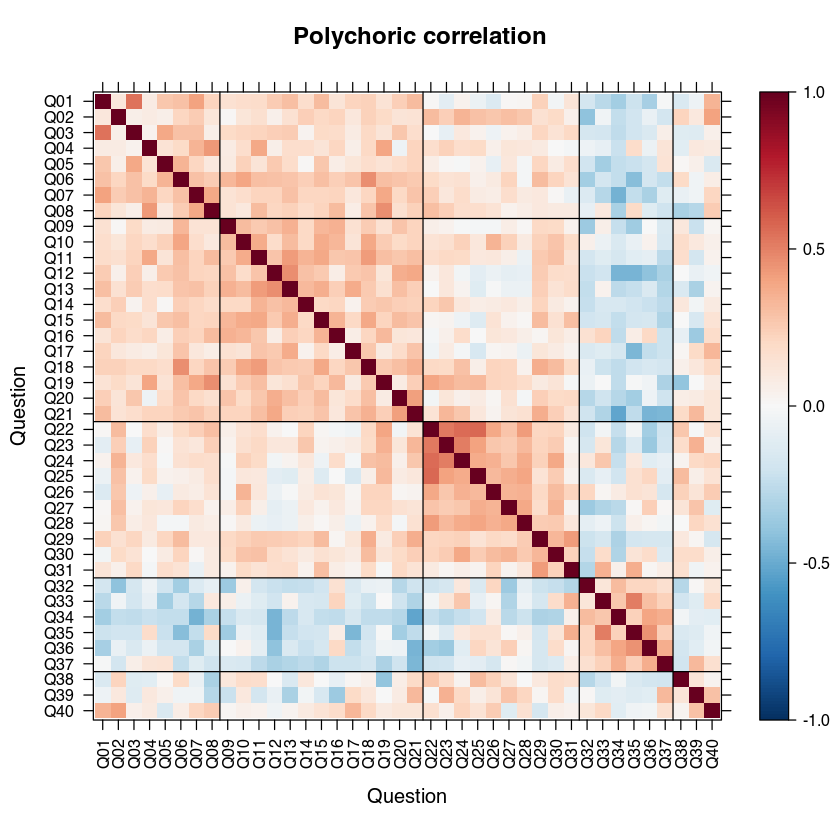

In [10]:
cols = colorRampPalette(rev(brewer.pal(11, "RdBu"))) # 'PuOr')))

levelplot(t(corr_poly_all$rho[c(nrow(corr_poly_all$rho):1) , ]), scales=list(x=list(rot=90)), col.regions=cols, main = 'Polychoric correlation', xlab = 'Question', ylab = 'Question', at=seq(-1, 1, length=200), 
          panel = function(...) {
          panel.levelplot(...)
          panel.abline(v = 8.5, h = 32.5)
          panel.abline(v = 21.5, h = 19.5)
          panel.abline(v = 31.5, h = 9.5)
          panel.abline(v = 37.5, h = 3.5)
          }
        )

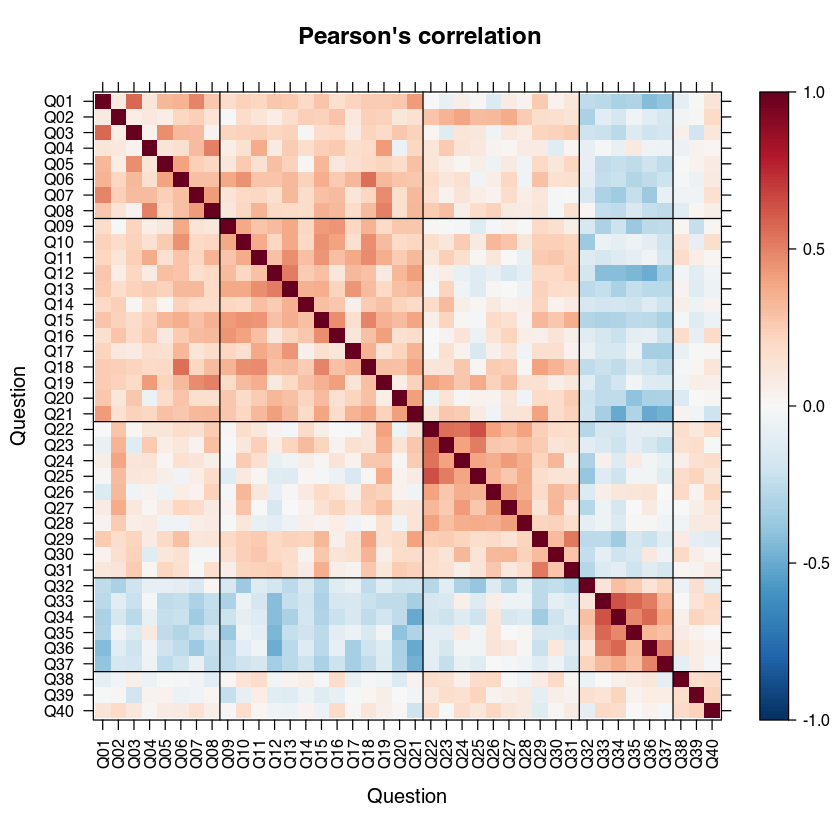

In [11]:
levelplot(t(corr_pears_all$r[c(nrow(corr_pears_all$r):1) , ]), scales=list(x=list(rot=90)), col.regions=cols, main = 'Pearson\'s correlation', xlab = 'Question', ylab = 'Question', at=seq(-1, 1, length=200), 
          panel = function(...) {
          panel.levelplot(...)
          panel.abline(v = 8.5, h = 32.5)
          panel.abline(v = 21.5, h = 19.5)
          panel.abline(v = 31.5, h = 9.5)
          panel.abline(v = 37.5, h = 3.5)
          }
        )

In [18]:
library(MASS)
write.matrix(corr_pears_all$r, 'behavioral_correlation_fmri.csv', sep = ',')